### Utilización del modelo de Árbol de Decisión para regresión

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [9]:
X=pd.DataFrame(data.data, columns=data.feature_names)
Y=data.target

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.3)

In [12]:
from sklearn.tree import DecisionTreeRegressor

model_tree_1 = DecisionTreeRegressor()

model_tree_1.fit(X_train, Y_train)
Y_pred_1 = model_tree_1.predict(X_test)

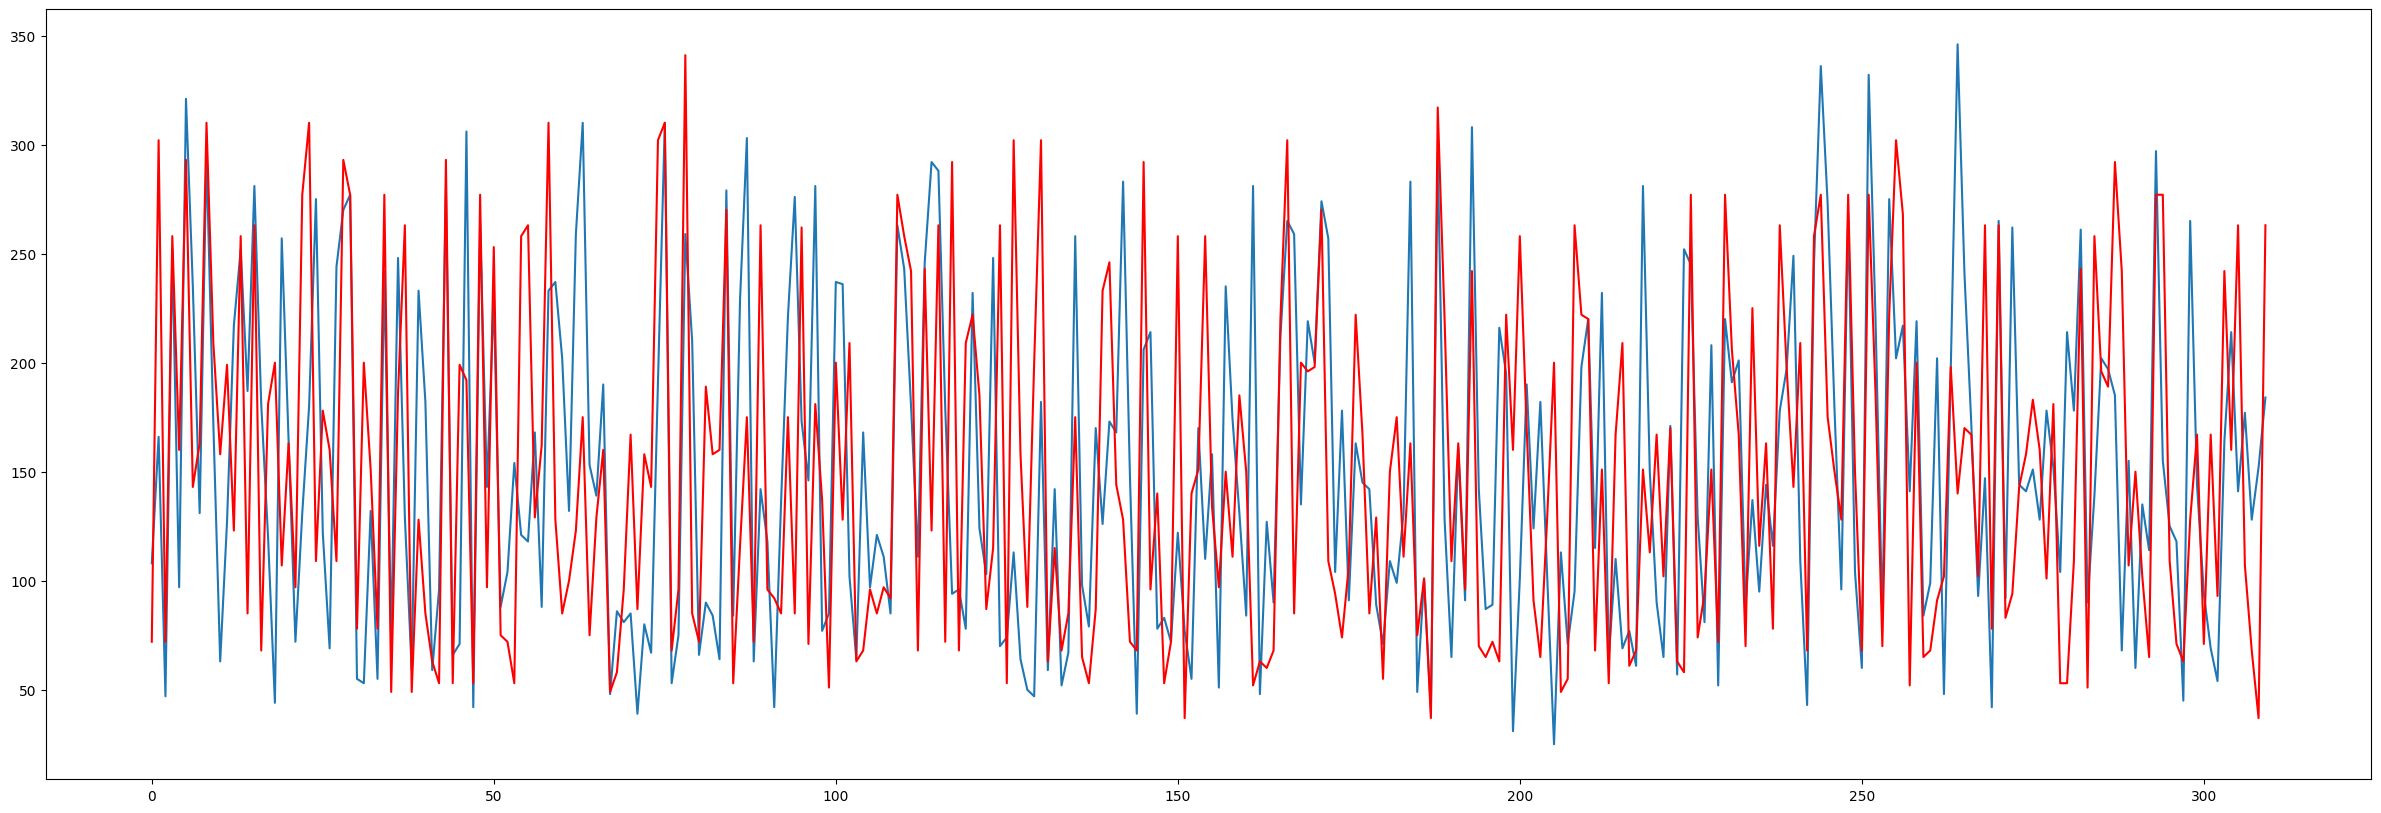

In [13]:
plt.figure(figsize=(30,10))
plt.plot(Y_test)
plt.plot(Y_pred_1, 'r')
plt.show()

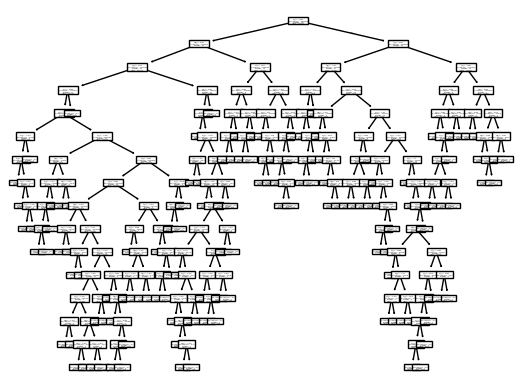

In [15]:
from sklearn.tree import plot_tree
_=plot_tree(model_tree_1)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, Y_pred_1)
mae = mean_absolute_error(Y_test, Y_pred_1)
r2 = r2_score(Y_test,Y_pred_1)

print(f'MSE: {mse} MAE: {mae} R2: {r2}')

MSE: 6292.1 MAE: 60.99032258064516 R2: -0.05413087364097491


Es posible observar que el modelo de regresión no es de lo mas eficiente por lo que es necesario realizar una sintinización

### Sintonización del modelo

Para la sintonización del modelo se utilizará GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

model_cv = DecisionTreeRegressor()

param_grid = {
    'max_depth': np.arange(1,10).tolist(),
    'min_samples_split': np.arange(2,10).tolist()
}
grid = GridSearchCV(estimator=model_cv, param_grid=param_grid, cv = 10, scoring = 'r2')
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='r2')

In [50]:
print(grid.best_score_)
print(grid.best_params_)

0.33647093831400643
{'max_depth': 3, 'min_samples_split': 2}


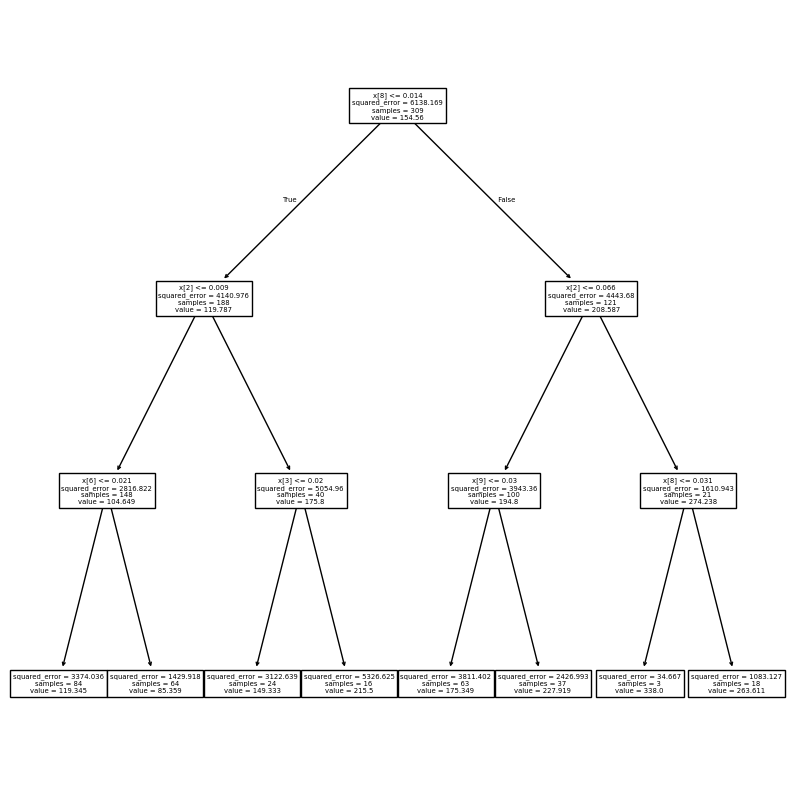

In [51]:
plt.figure(figsize=(10,10))

_=plot_tree(grid.best_estimator_)

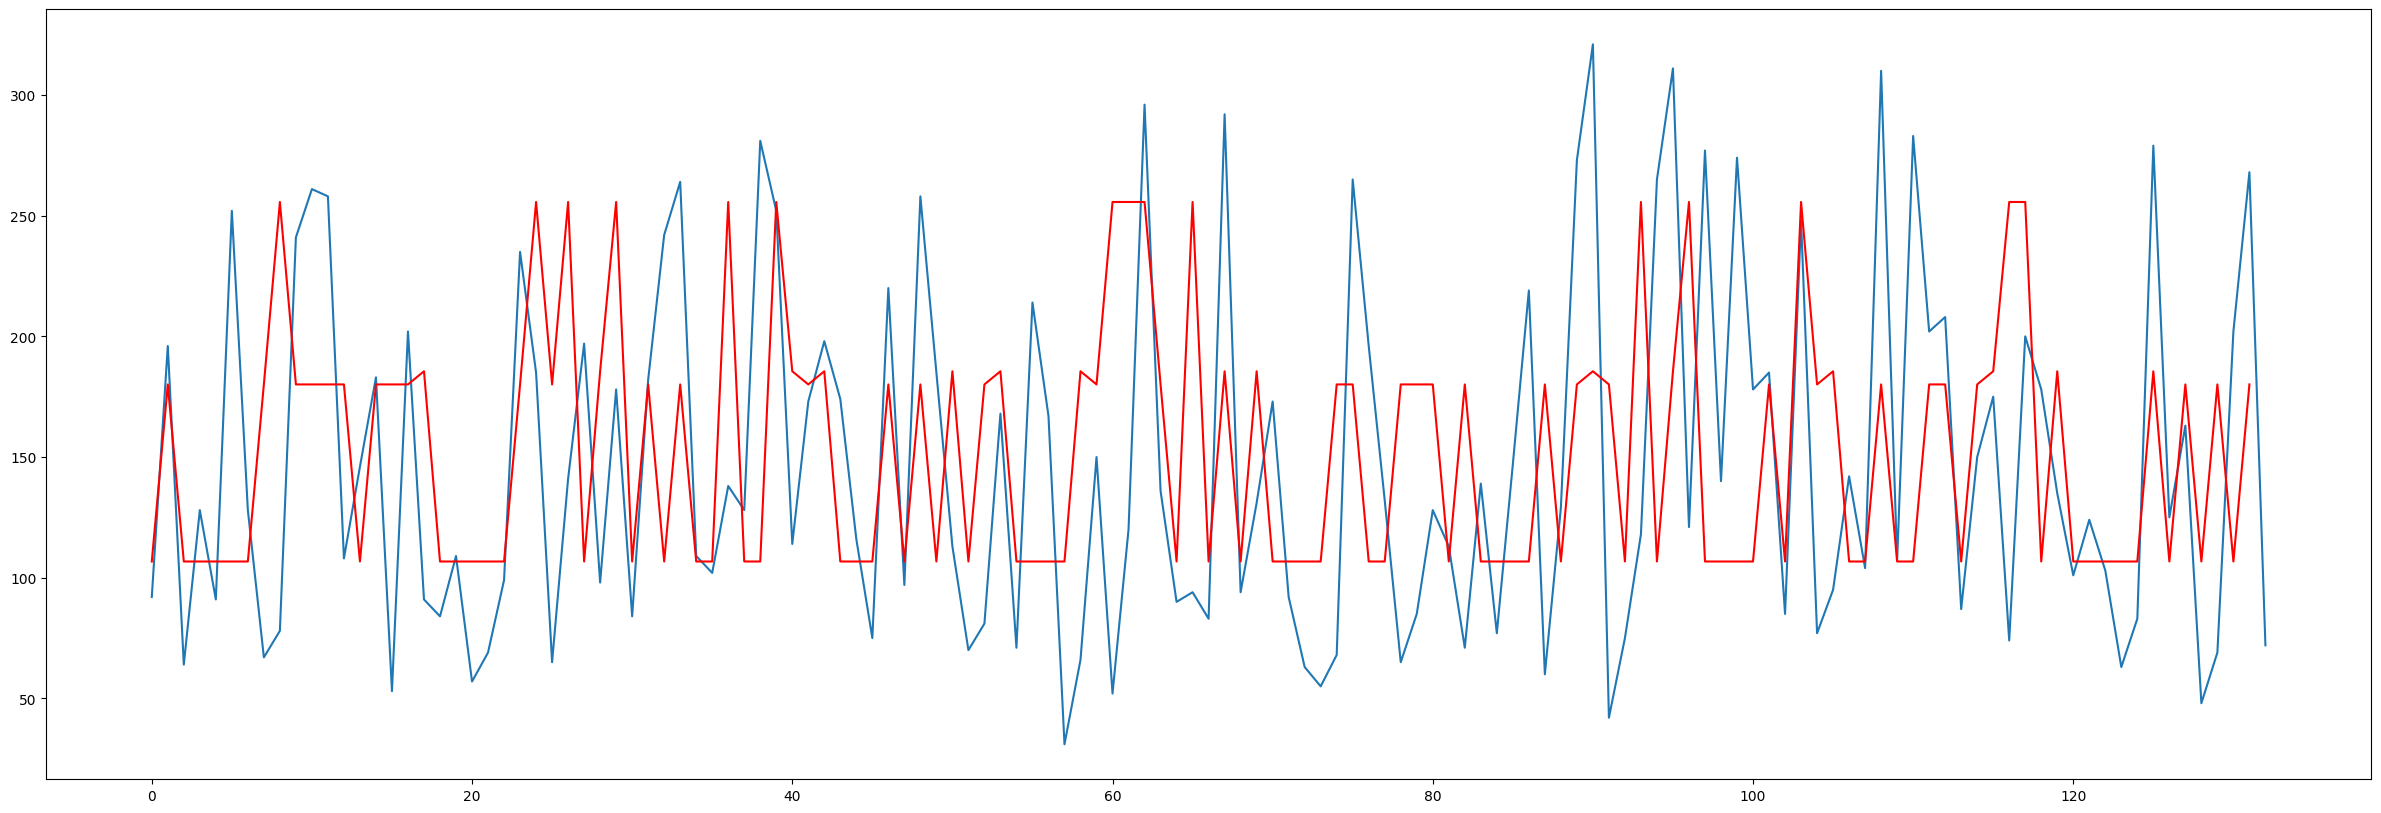

In [45]:
plt.figure(figsize=(30,10))
plt.plot(Y_test)
plt.plot(Y_pred_cv, 'r')
plt.show()

In [48]:
Y_pred_cv = grid.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_cv)
mae = mean_absolute_error(Y_test, Y_pred_cv)
r2 = r2_score(Y_test,Y_pred_cv)

print(f'MSE: {mse} MAE: {mae} R2: {r2}')

MSE: 3926.3931594424353 MAE: 49.49953955029143 R2: 0.27296025609830865


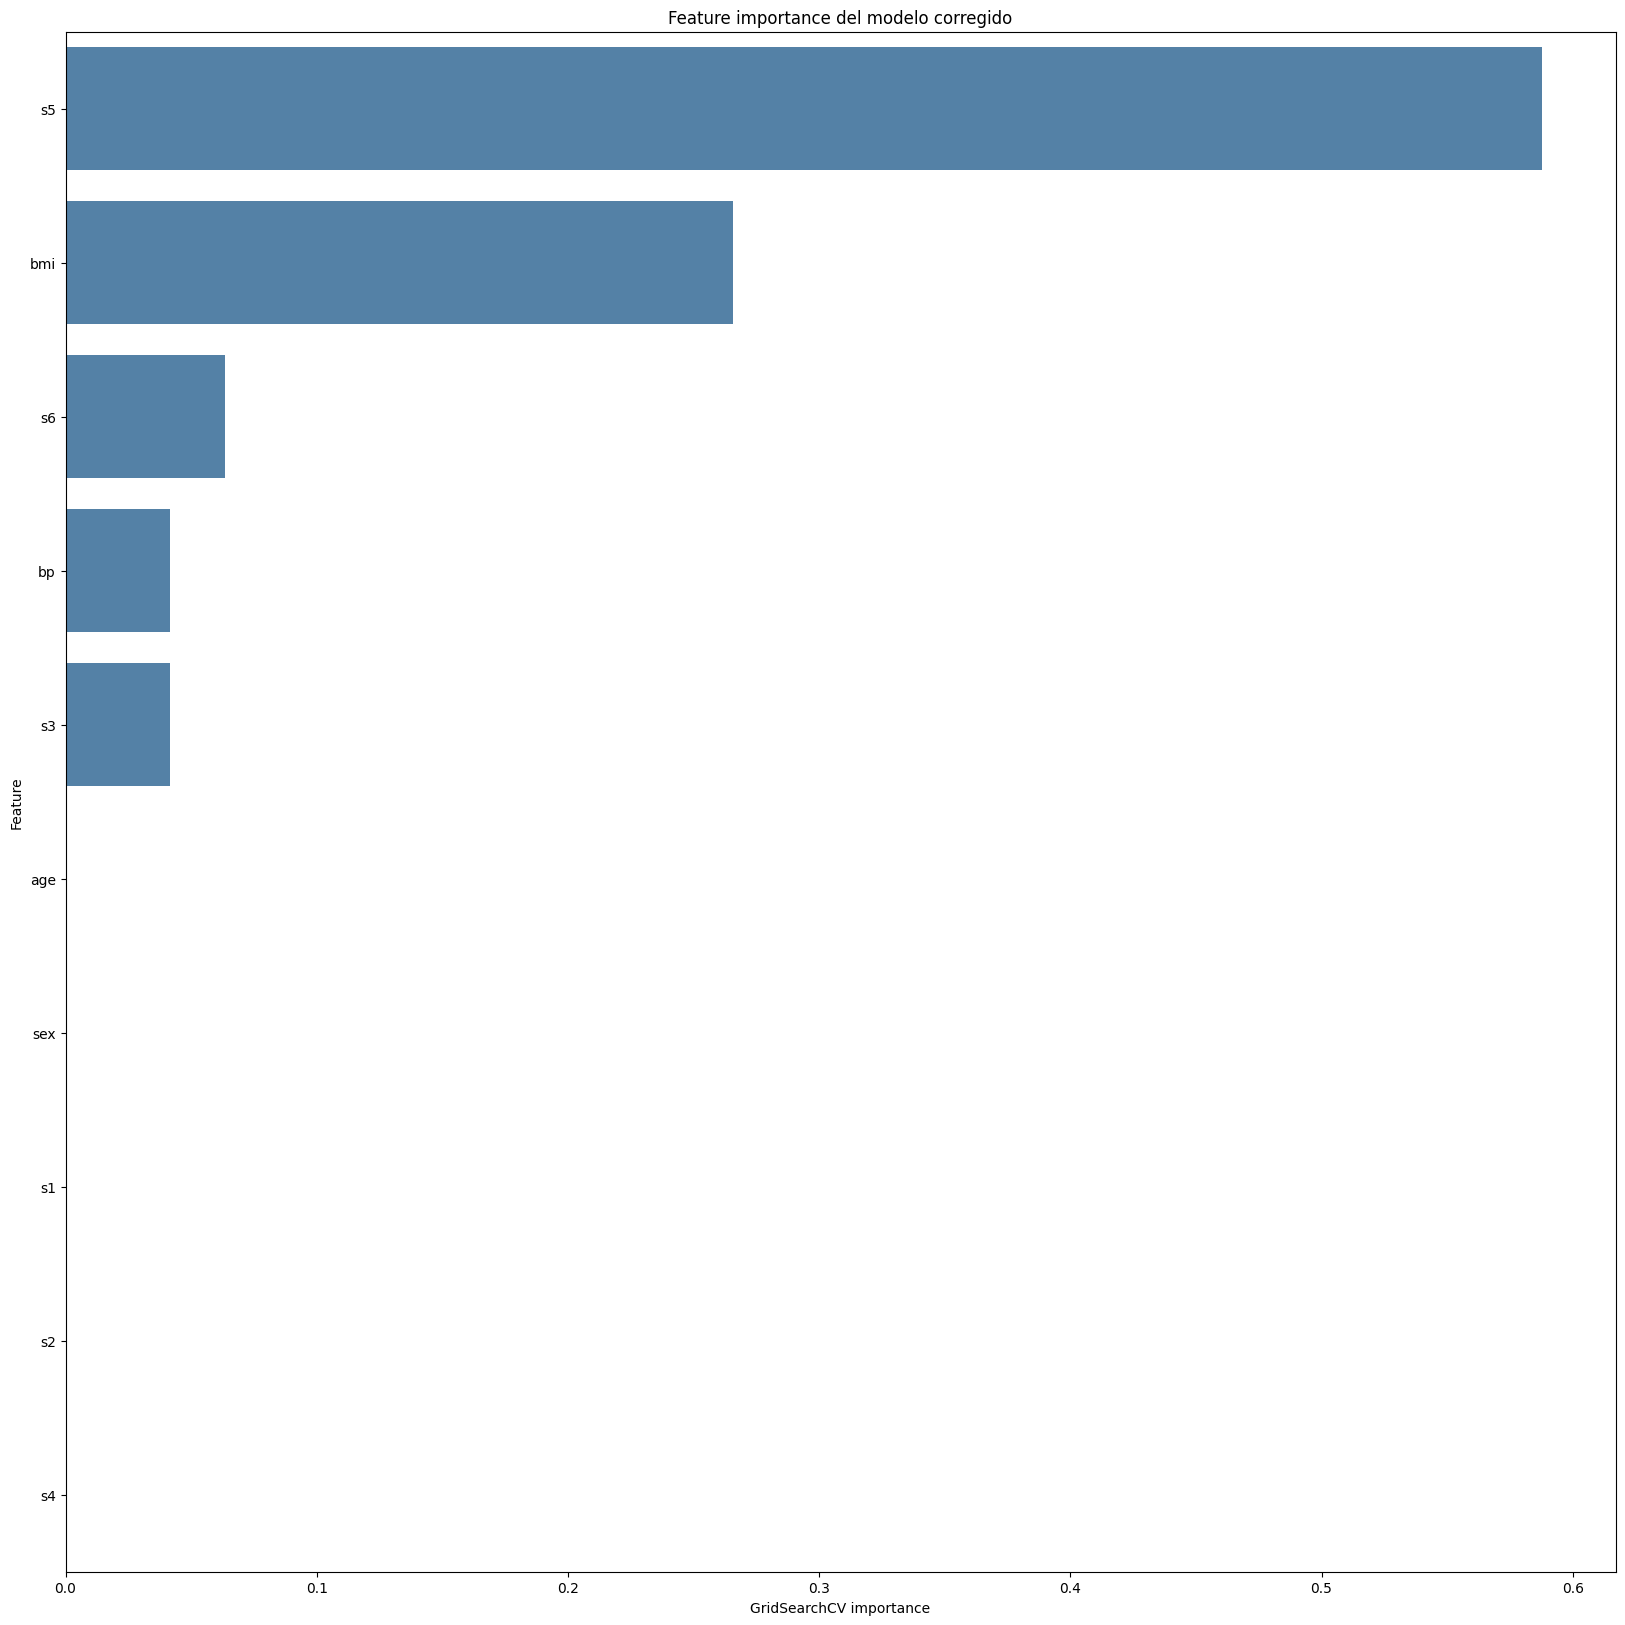

In [53]:
features_importance = grid.best_estimator_.feature_importances_
features = pd.DataFrame(data.data, columns=data.feature_names)
feature_importance_grid = pd.DataFrame({'Feature': features.columns, 'GridSearchCV importance':features_importance}).sort_values('GridSearchCV importance', ascending=False)
plt.figure(figsize=(20,20))
sns.barplot(x = feature_importance_grid['GridSearchCV importance'], y = feature_importance_grid['Feature'], color = 'steelblue', orient='h')
plt.title('Feature importance del modelo corregido')
plt.show()